<a href="https://colab.research.google.com/github/kidsage/KaggleStudy/blob/main/Getting_started_with_a_movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Age of Recommender Systems

데이터 수집의 급속한 성장은 정보의 새로운 시대를 이끌었습니다.  
데이터는 보다 효율적인 시스템을 만드는 데 사용되며 추천 시스템이 작동하는 곳입니다.  
추천 시스템은 검색 결과의 품질을 향상시키고 검색 항목과 더 관련성이 있거나 사용자의 검색 이력과 실감되는 항목을 제공하기 때문에 정보 필터링 시스템의 일종입니다.

사용자가 항목에 부여할 등급이나 선호도를 예측하는 데 사용됩니다. 거의 모든 주요 기술 회사는 이를 어떤 형태로든 적용했습니다. Amazon은 이를 고객에게 제품을 제안하는 데 사용하고 YouTube는 자동 재생에서 다음에 재생할 비디오를 결정하는 데 사용하며 Facebook은 이를 사용하여 좋아요 표시할 페이지와 팔로우할 사람들을 추천합니다. 또한 Netflix 및 Spotify와 같은 회사는 비즈니스 및 성공을 위한 추천 엔진의 효율성에 크게 의존합니다.

이 커널에서는 TMDB 5000 Movie Dataset을 사용하여 기준 영화 추천 시스템을 구축할 것입니다.  
저와 같은 초보자를 위해 이 커널은 추천 시스템의 기초 역할을 하고 시작할 수 있는 무언가를 제공할 것입니다.

# There are basically three types of recommender systems:

- **Demographic Filtering**  
: 영화 인기도 및/또는 장르를 기반으로 모든 사용자에게 일반화된 추천을 제공합니다. 시스템은 유사한 인구 통계학적 특징을 가진 사용자에게 동일한 영화를 추천합니다. 사용자마다 다르기 때문에 이 접근 방식은 너무 단순하다고 간주됩니다. 이 시스템의 기본 아이디어는 더 인기 있고 비평가들의 찬사를 받은 영화가 일반 관객에게 더 좋아질 확률이 더 높다는 것입니다.
- **Content Based Filtering**  
: 그들은 특정 항목을 기반으로 유사한 항목을 제안합니다. 이 시스템은 영화의 장르, 감독, 설명, 배우 등과 같은 항목 메타데이터를 사용하여 이러한 권장 사항을 만듭니다. 이러한 추천 시스템의 이면에 있는 일반적인 아이디어는 사람이 특정 항목을 좋아하면 그와 유사한 항목도 좋아한다는 것입니다.
- **Collaborative Filterin**  
: 이 시스템은 유사한 관심사를 가진 사람들을 매칭하고 이 매칭을 기반으로 추천을 제공합니다. 협업 필터에는 콘텐츠 기반 필터와 같은 항목 메타데이터가 필요하지 않습니다

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets download -d rounakbanik/the-movies-dataset
# !kaggle datasets download -d tmdb/tmdb-movie-metadata

In [ ]:
# !unzip the-movies-dataset.zip
# !unzip tmdb-movie-metadata.zip

In [8]:
import pandas as pd 
import numpy as np 
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

The first dataset contains the following features:

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.


The second dataset has the following features:

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count - the count of votes recieved.

In [9]:
df1.columns = ['id', 'tittle', 'cast', 'crew']
df2 = df2.merge(df1,on='id')

In [10]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Demographic Filtering

시작하기에 앞서
* 영화에 점수를 매기거나 평가하려면 측정항목이 필요합니다.
* 모든 영화의 점수를 계산해야합니다.
* 점수를 정렬하고 최고 등급의 영화를 사용자에게 추천합니다.

영화의 평균 평점을 점수로 사용할 수는 있지만 평균 평점이 8.9이고 3표만 있는 영화가 평균 평점인 7.8이지만 40표인 영화보다 낫다고 볼 수 없기 때문에 이것을 사용하는 것은 충분히 공정하지 않습니다.  
따라서 다음과 같이 주어진 IMDB의 가중 등급(wr)을 사용할 것입니다.

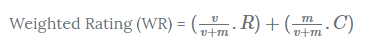

- v는 영화에 대한 투표 수입니다.
- m은 차트에 나열되는 데 필요한 최소 투표수입니다.
- R은 영화의 평균 등급입니다. 그리고
- C는 전체 리포트의 평균 투표수입니다.

우리는 이미 v(vote_count)와 R(vote_average)을 가지고 있고 C는 다음과 같이 계산할 수 있습니다.

In [11]:
C = df2['vote_average'].mean()
C

6.092171559442011

따라서 모든 영화의 평균 등급은 10점 만점에 약 6입니다. 다음 단계는 차트에 나열되는 데 필요한 최소 표인 m에 대한 적절한 값을 결정하는 것입니다. 90번째 백분위수를 컷오프로 사용합니다. 즉, 영화가 차트에 오르려면 목록에 있는 영화의 90% 이상을 득표해야 합니다.

In [12]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

이제 차트에 적합한 영화를 필터링할 수 있습니다.

In [13]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)


이 목록에 포함될 자격이 있는 481개의 영화가 있습니다. 이제 자격을 갖춘 각 영화에 대한 메트릭을 계산해야 합니다.  
이를 위해 weighted_rating() 함수를 정의하고 새 기능 점수를 정의합니다. 이 함수를 검증된 영화의 DataFrame에 적용하여 값을 계산합니다.

In [14]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

마지막으로 점수 기능을 기반으로 DataFrame을 정렬하고 상위 10개 영화의 제목, 투표 수, 투표 평균 및 가중치 평점 또는 점수를 출력합니다.

In [16]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


만세! 우리는 첫 번째(매우 기본적인) 추천자를 만들었습니다.  
이러한 시스템의 현재 인기 탭에서 우리는 매우 인기 있는 영화를 찾고 인기도 열을 기준으로 데이터세트를 정렬하여 얻을 수 있습니다.

Text(0.5, 1.0, 'Popular Movies')

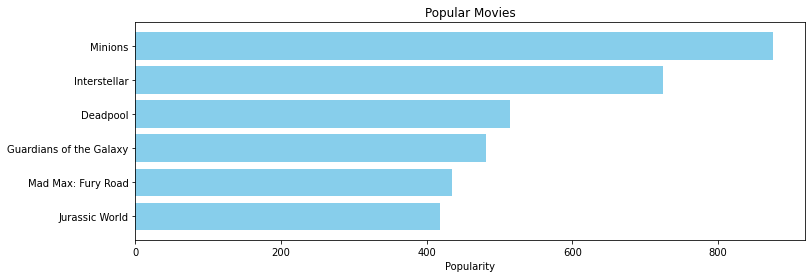

In [17]:
pop = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), 
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


이제 명심해야 할 것은 이러한 인구통계학적 추천자가 모든 사용자에게 추천 영화의 일반 차트를 제공한다는 것입니다.  
그들은 특정 사용자의 관심과 취향에 민감하지 않습니다. 이것은 보다 세련된 시스템인 콘텐츠 기반 필터링으로 넘어갈 때입니다.

# Content Based Filtering


이 추천 시스템에서 영화의 내용(개요, 출연진, 제작진, 키워드, 태그라인 등)은 다른 영화와의 유사성을 찾는 데 사용됩니다.  
그런 다음 가장 유사할 가능성이 높은 영화를 추천합니다.

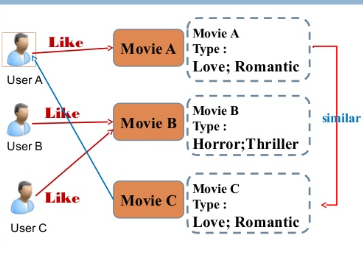

# Plot description based Recommender

줄거리 설명을 기반으로 모든 영화에 대한 쌍별 유사성 점수를 계산하고 유사성 점수를 기반으로 영화를 추천합니다.  
플롯 설명은 데이터 세트의 개요 기능에 나와 있습니다. 데이터를 살펴보겠습니다.

In [18]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

텍스트 처리를 조금이라도 해 본 사람이라면 각 개요의 단어 벡터를 변환해야 한다는 것을 알고 있습니다. 이제 각 개요에 대한 TF-IDF(Term Frequency-Inverse Document Frequency) 벡터를 계산합니다.  

이제 용어 빈도가 무엇인지 궁금하다면 문서에서 단어의 상대적 빈도이며 (용어 인스턴스/총 인스턴스)로 지정됩니다. 역 문서 빈도는 해당 용어를 포함하는 문서의 상대적 개수를 log(문서/용어가 있는 문서 수)로 표시합니다. 각 단어가 나타나는 문서에 대한 전체 중요도는 TF * IDF와 같습니다.  

이것은 각 열이 개요 어휘(최소한 하나의 문서에 나타나는 모든 단어)의 단어를 나타내고 각 행이 이전과 같이 영화를 나타내는 행렬을 제공합니다. 이것은 플롯 개요에서 자주 발생하는 단어의 중요성을 줄이기 위해 수행되므로 최종 유사성 점수를 계산할 때 단어의 중요성을 줄입니다.

다행히 scikit-learn은 몇 줄로 TF-IDF 행렬을 생성하는 내장 TfIdfVectorizer 클래스를 제공합니다. 굿?

In [19]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

데이터 세트에서 4800개의 영화를 설명하는 데 20,000개 이상의 다른 단어가 사용되었음을 알 수 있습니다.  

이 행렬을 사용하여 이제 유사성 점수를 계산할 수 있습니다. 이에 대한 여러 후보가 있습니다.  
유클리드, 피어슨 및 코사인 유사도 점수와 같은. 어떤 점수가 가장 좋다는 정답은 없습니다. 서로 다른 점수는 서로 다른 시나리오에서 잘 작동하며 종종 다른 측정항목으로 실험하는 것이 좋습니다.

우리는 코사인 유사성을 사용하여 두 영화 간의 유사성을 나타내는 숫자 수량을 계산할 것입니다. 코사인 유사도 점수는 크기와 무관하고 계산이 비교적 쉽고 빠르기 때문에 사용합니다. 수학적으로는 다음과 같이 정의됩니다.

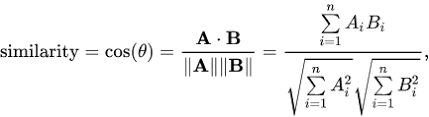

TF-IDF 벡터라이저를 사용했기 때문에 내적을 계산하면 코사인 유사성 점수가 직접 제공됩니다.  
따라서 cosine_similarities() 대신 sklearn의 linear_kernel()이 더 빠르기 때문에 사용합니다.

In [20]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화 제목을 입력으로 받아 가장 유사한 10개의 영화 목록을 출력하는 함수를 정의할 것입니다. 먼저 이를 위해 영화 제목과 DataFrame 인덱스의 역 매핑이 필요합니다.  
다시 말해, 제목이 주어지면 메타데이터 DataFrame에서 영화의 인덱스를 식별하는 메커니즘이 필요합니다.

In [21]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

이제 추천 기능을 정의할 수 있는 좋은 상태에 있습니다. 다음 단계는 우리가 따를 것입니다:

* 제목이 지정된 영화의 인덱스를 가져옵니다.
* 모든 영화와 함께 특정 영화에 대한 코사인 유사도 점수 목록을 가져옵니다. 첫 번째 요소가 위치이고 두 번째 요소가 유사성 점수인 튜플 목록으로 변환합니다.
* 유사성 점수를 기반으로 앞서 언급한 튜플 목록을 정렬합니다. 즉, 두 번째 요소입니다.
* 이 목록의 상위 10개 요소를 가져옵니다. 첫 번째 요소는 self를 나타내므로 무시하십시오(특정 영화와 가장 유사한 영화는 영화 자체임).
* 상위 요소의 인덱스에 해당하는 제목을 반환합니다.

In [22]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [23]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [24]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object


우리 시스템은 유사한 줄거리 설명을 가진 영화를 찾는 데 괜찮은 작업을 수행했지만 권장 사항의 품질은 그리 좋지 않습니다.  
"다크 나이트 라이즈"는 모든 배트맨 영화를 반환하지만 그 영화를 좋아한 사람들은 다른 크리스토퍼 놀란 영화를 더 즐기는 경향이 있습니다. 이것은 현재 시스템으로 포착할 수 없는 것입니다.

(위의 사항은 커널 원작자의 도메인 지식에 기반한 것이다.  
따라서 분석에는 도메인에 대한 기초지식이 매우 중요한 것을 볼 수 있다. 성능에 직결되기 때문.)

# Credits, Genres and Keywords Based Recommender

더 나은 메타데이터를 사용하면 추천자의 품질이 향상될 것입니다. 이것이 바로 이 섹션에서 우리가 할 일입니다. 탑 배우 3인, 감독, 관련 장르, 영화 줄거리 키워드 등의 메타데이터를 기반으로 추천기를 구축할 예정입니다.

출연진, 제작진 및 키워드 기능에서 가장 중요한 세 배우, 감독 및 해당 영화와 관련된 키워드를 추출해야 합니다. 현재 우리의 데이터는 "문자열화된" 목록의 형태로 존재합니다. 우리는 그것을 안전하고 사용 가능한 구조로 변환해야 합니다.

In [25]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

다음으로 각 기능에서 필요한 정보를 추출하는 데 도움이 되는 기능을 작성합니다.

In [26]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [27]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [28]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [29]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


다음 단계는 이름과 키워드 인스턴스를 소문자로 변환하고 그 사이의 모든 공백을 제거하는 것입니다.  
이것은 벡터라이저가 "Johnny Depp"과 "Johnny Galecki"의 Johnny를 동일하게 계산하지 않도록 수행됩니다.

In [30]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [31]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)


이제 우리는 벡터라이저에 제공하려는 모든 메타데이터(즉, 배우, 감독 및 키워드)를 포함하는 문자열인 "메타데이터 수프"를 생성할 수 있는 위치에 있습니다.

In [32]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

다음 단계는 플롯 설명 기반 추천기로 수행한 것과 동일합니다.  
한 가지 중요한 차이점은 TF-IDF 대신 CountVectorizer()를 사용한다는 것입니다.  
상대적으로 더 많은 영화에 출연하거나 감독한 배우/감독의 존재를 축소하고 싶지 않기 때문입니다. 별로 직관적이지 않습니다.

In [33]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [34]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [35]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

이제 새로운 cosine_sim2 행렬을 두 번째 인수로 전달하여 get_recommendations() 함수를 재사용할 수 있습니다.

In [36]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [37]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

우리는 추천자가 더 많은 메타데이터로 인해 더 많은 정보를 성공적으로 캡처했으며 더 나은 추천을 제공했음을 알 수 있습니다.  
마블이나 DC 코믹스 팬들은 같은 제작사의 영화를 좋아할 가능성이 더 큽니다.  
따라서 위의 기능에 production_company 를 추가할 수 있습니다. 수프에 기능을 여러 번 추가하여 감독의 가중치를 높일 수도 있습니다.

# Collaborative Filtering
콘텐츠 기반 엔진은 몇 가지 심각한 제한 사항을 겪고 있습니다. 특정 영화에 가까운 영화만 추천할 수 있습니다. 즉, 취향을 포착하고 장르를 초월한 추천을 제공할 수 없습니다.

또한 우리가 구축한 엔진은 사용자의 개인적인 취향과 편견을 포착하지 못한다는 점에서 실제로 개인적인 것이 아닙니다.  
영화를 기반으로 한 추천에 대해 우리 엔진에 쿼리하는 사람은 누구인지에 관계없이 해당 영화에 대해 동일한 추천을 받게 됩니다.

따라서 이 섹션에서는 공동 필터링이라는 기술을 사용하여 영화 감상자에게 추천할 것입니다. 기본적으로 두 가지 유형이 있습니다.

* **User based filtering**
: 이 시스템은 유사한 사용자가 좋아한 사용자에게 제품을 추천합니다.  
두 사용자 간의 유사성을 측정하기 위해 피어슨 상관 또는 코사인 유사도를 사용할 수 있습니다.  
이 필터링 기술은 예를 들어 설명할 수 있습니다.  
다음 행렬에서 각 행은 사용자를 나타내고 열은 해당 사용자와 대상 사용자 간의 유사성을 기록하는 마지막 영화를 제외하고 다른 영화에 해당합니다.  
각 셀은 사용자가 해당 영화에 부여한 등급을 나타냅니다. 사용자 E가 대상이라고 가정합니다.

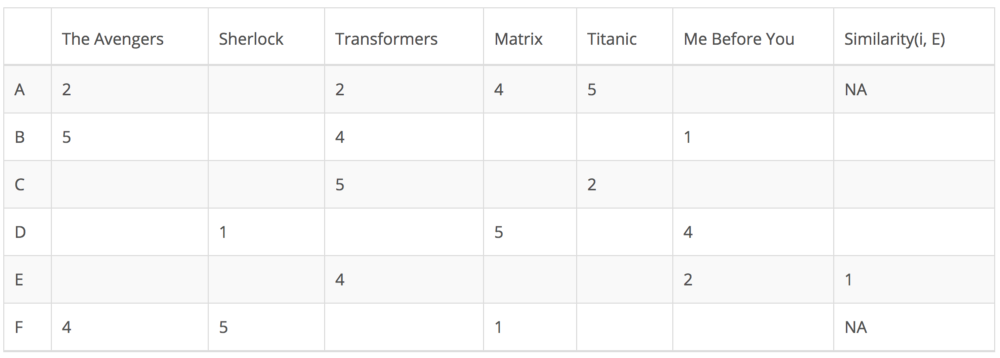

사용자 A와 F는 사용자 E와 어떤 영화 등급도 공유하지 않기 때문에 사용자 E와의 유사성은 Pearson Correlation에서 정의되지 않습니다. 따라서 사용자 B, C, D만 고려하면 됩니다.  
Pearson Correlation을 기반으로 다음과 같은 유사도를 계산할 수 있습니다.

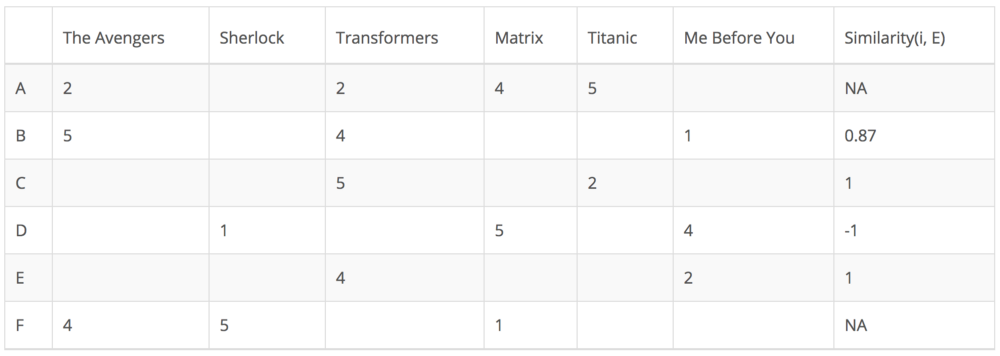


위의 표에서 사용자 D는 사용자 E와 Pearson Correlation이 음수이므로 사용자 E와 매우 다르다는 것을 알 수 있습니다.  
그는 Me Before You를 자신의 평균보다 높게 평가했지만 사용자 E는 그 반대였습니다.  
이제 사용자 E가 다른 사용자를 기반으로 평가하지 않은 영화의 공백을 채울 수 있습니다.

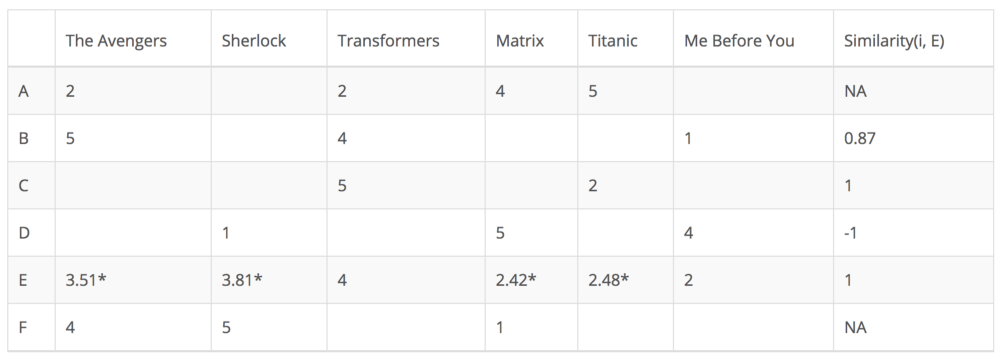

사용자 기반 CF를 계산하는 것은 매우 간단하지만 몇 가지 문제가 있습니다. 한 가지 주요 문제는 사용자의 선호도가 시간이 지남에 따라 변할 수 있다는 것입니다.  
인접 사용자를 기반으로 행렬을 미리 계산하면 성능이 저하될 수 있음을 나타냅니다.  
이 문제를 해결하기 위해 항목 기반 CF를 적용할 수 있습니다.

* **Item Based Collaborative Filtering**  
: 아이템 기반 CF는 사용자 간의 유사도를 측정하는 대신 대상 사용자가 평가한 아이템과의 유사도를 기반으로 아이템을 추천합니다.  
마찬가지로 유사성은 Pearson Correlation 또는 Cosinesimilarity를 ​​사용하여 계산할 수 있습니다.  
주요 차이점은 항목 기반 협업 필터링을 사용하여 사용자 기반 CF가 수행하는 수평 방식과 반대로 공백을 수직으로 채운다는 것입니다. 다음 표는 영화 Me Before You에 대해 그렇게 하는 방법을 보여줍니다.

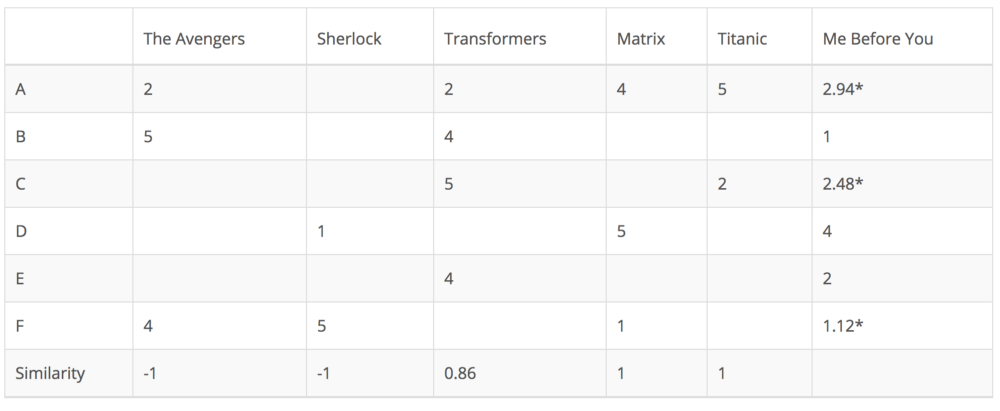

t는 항목 기반 CF가 더 정적이기 때문에 동적 사용자 기본 설정으로 인해 발생하는 문제를 성공적으로 방지합니다.  
그러나 이 방법에는 몇 가지 문제가 남아 있습니다.  
첫째, 주요 문제는 확장성입니다. 계산은 고객과 제품 모두와 함께 커집니다. 최악의 경우 복잡성은 m명의 사용자와 n개의 항목이 있는 O(mn)입니다. 또한 희소성은 또 다른 문제입니다.  
위의 표를 다시 한 번 보세요.  
Matrix와 Titanic을 모두 평가한 사용자는 단 한 명뿐이지만 둘 사이의 유사도는 1입니다. 극단적인 경우 수백만 명의 사용자가 있을 수 있으며 두 영화의 유사성은 단순히 순위가 비슷하기 때문에 매우 높을 수 있습니다. 둘 다 순위를 매긴 유일한 사용자입니다.

**Single Value Decomposition**

CF에 의해 생성된 확장성 및 희소성 문제를 처리하는 한 가지 방법은 잠재 요인 모델을 활용하여 사용자와 항목 간의 유사성을 캡처하는 것입니다.  
본질적으로 우리는 추천 문제를 최적화 문제로 바꾸고 싶습니다. 사용자에게 주어진 항목에 대한 평가를 얼마나 잘 예측하는지로 볼 수 있습니다.  
하나의 일반적인 메트릭은 RMSE(평균제곱근 오차)입니다. RMSE가 낮을수록 성능이 좋습니다.

이제 잠재 요소에 대해 이야기하면서 그것이 무엇인지 궁금할 것입니다. 사용자나 항목이 가지고 있는 속성이나 개념을 설명하는 광범위한 개념입니다.  
예를 들어 음악의 경우 잠재 요소는 음악이 속한 장르를 나타낼 수 있습니다. SVD는 잠재 요인을 추출하여 유틸리티 매트릭스의 차원을 줄입니다. 기본적으로 각 사용자와 각 항목을 차원 r의 잠재 공간에 매핑합니다.  
따라서 직접 비교할 수 있는 사용자와 항목 간의 관계를 더 잘 이해하는 데 도움이 됩니다. 아래 그림은 이 아이디어를 보여줍니다.

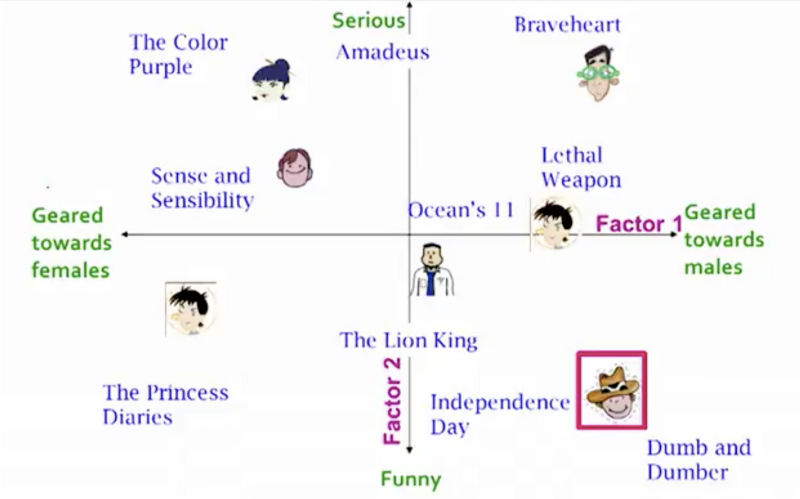

이제 이것을 구현하는 방법을 살펴보겠습니다.  
이전에 사용한 데이터셋에는 협업 필터링에 필요한 userId가 없으므로 다른 데이터셋을 불러오도록 하겠습니다.  
우리는 SVD를 구현하기 위해 Surprise 라이브러리를 사용할 것입니다.

In [ ]:
# !pip install surprise

In [42]:
# surprise에서 evaluate가 1.1.0버전에서 삭제됨 따라서 아래와 같은 방법으로 실행해야 함
# from surprise import Reader, Dataset, SVD, evaluate
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate # evaluate 대체

reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


이 데이터 세트에서 영화는 이전 영화와 달리 5 등급으로 평가됩니다.

In [51]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# data.split(n_folds=5)
svd = SVD()
# evaluate(svd, data, measures=['RMSE', 'MAE'])

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)

{'fit_time': (6.0250771045684814,
  5.469029903411865,
  5.8455870151519775,
  5.270076751708984,
  5.374766111373901),
 'test_mae': array([0.68800467, 0.68940544, 0.69090629, 0.68927598, 0.68895171]),
 'test_rmse': array([0.89385488, 0.89672689, 0.8984803 , 0.89449776, 0.89548508]),
 'test_time': (0.21708321571350098,
  0.16384434700012207,
  0.29003071784973145,
  0.1914982795715332,
  0.37594175338745117)}

우리는 대략 0.89의 평균 Root Mean Sqaure Error를 얻습니다. 이것은 우리의 경우에 충분합니다. 이제 데이터 세트를 학습하고 예측에 도달하겠습니다.

In [52]:
trainset = data.build_full_trainset()
svd.fit(trainset)

사용자 ID가 1인 사용자를 선택하고 사용자가 부여한 등급을 확인하겠습니다.

In [53]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [54]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7284847764195157, details={'was_impossible': False})


ID가 302인 영화의 경우 예상 예측값은 2.618(2.728아닌가?)입니다.  
이 추천 시스템의 놀라운 기능 중 하나는 영화가 무엇인지(또는 무엇을 포함하는지) 상관하지 않는다는 것입니다.  
할당된 영화 ID를 기반으로 순전히 작동하며 다른 사용자가 영화를 예측한 방법을 기반으로 등급을 예측하려고 시도합니다.

# Conclusion

인구 통계, 콘텐츠 기반 및 협업 필터링을 사용하여 추천자를 만듭니다. 인구통계학적 필터링은 매우 기초적이고 실질적으로 사용할 수 없지만 하이브리드 시스템은 두 가지 접근 방식이 거의 상호 보완적임이 입증되기 때문에 콘텐츠 기반 및 협업 필터링을 활용할 수 있습니다. 이 모델은 매우 기본적이었고 시작하기 위한 기본적인 프레임워크만 제공했습니다.

I would like to mention some excellent refereces that I learned from
1. https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
2. https://www.kaggle.com/rounakbanik/movie-recommender-systems
3. http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf

